In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [39]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [45]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_x=x[k_indices[k]]
    test_y=y[k_indices[k]]
    train_ind=set()
    for num,i in enumerate(k_indices):
        if(num!=k):
            train_ind=set.union(train_ind,i)
    train_ind=list(train_ind)
    train_x=x[train_ind]
    train_y=y[train_ind]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    train_x=build_poly(train_x, degree)
    test_x=build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    mse, w= ridge_regression(train_y, train_x, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr= compute_mse(train_y, train_x, w)
    loss_te= compute_mse(test_y, test_x, w)
    return loss_tr, loss_te

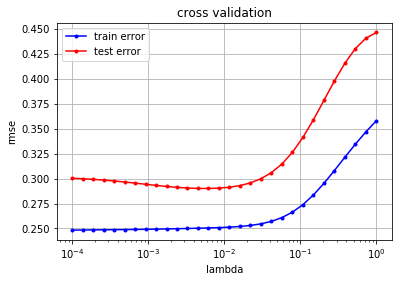

In [64]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        val_tr=0
        val_te=0
        for i in range(k_fold):
            s,r=cross_validation(y, x, build_k_indices(y, k_fold, seed), i, lambda_, degree)
            val_tr=val_tr+s
            val_te=val_te+r
        val_tr=val_tr/k_fold
        val_te=val_te/k_fold
        rmse_tr.append(np.sqrt(2*val_tr))
        # rmse_tr.append(val_tr)
        rmse_te.append(np.sqrt(2*val_te))
        # rmse_te.append(val_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

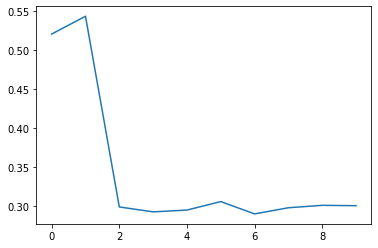

In [71]:
# 2 part
seed = 1
k_fold = 4
lambdas = np.logspace(-4, 0, 30)
# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)
minimi=[]
for d in range(1,11):
    rmse_te = []
    for lambda_ in lambdas:
        val_tr=0
        val_te=0
        for i in range(k_fold):
            s,r=cross_validation(y, x, build_k_indices(y, k_fold, seed), i, lambda_, d)
            val_te=val_te+r
        val_te=val_te/k_fold
        rmse_te.append(np.sqrt(2*val_te))
    minimi.append(min(rmse_te))
plt.plot(minimi)

[0.25587613 0.24968719 0.24182867 0.25671791]


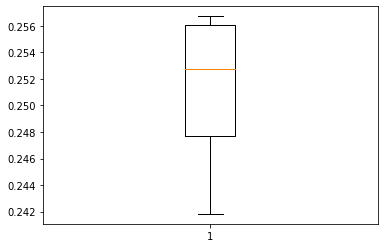

{'whiskers': [<matplotlib.lines.Line2D at 0x20043e335c8>,
 'caps': [<matplotlib.lines.Line2D at 0x20043d46208>,
 'boxes': [<matplotlib.lines.Line2D at 0x2004397a448>],
 'medians': [<matplotlib.lines.Line2D at 0x20043699fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2004390a3c8>],
 'means': []}

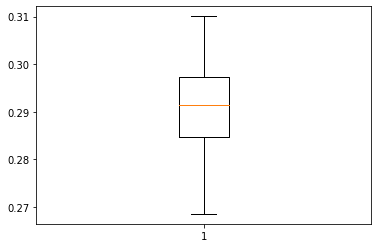

In [79]:
# variance graph for k fold=4 degree=7 lambda =10**-2
k_fold=4
degree=7
lambda_=10**(-2)
val_tr=np.array([])
val_te=np.array([])
for i in range(k_fold):
    s,r=cross_validation(y, x, build_k_indices(y, k_fold, seed), i, lambda_, degree)
    val_tr=np.append(val_tr,s)
    val_te=np.append(val_te,r)
val_tr=np.sqrt(2*val_tr)
val_te=np.sqrt(2*val_te)
print(val_tr)
plt.boxplot(val_tr)
plt.show()
plt.boxplot(val_te)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

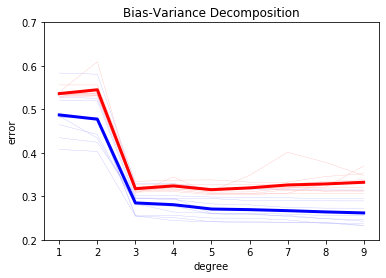

In [139]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    # seeds=range(0,100)
    seeds=range(50,60)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    lambdas = np.logspace(-4, 0, 30)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        tr_x, te_x, train_y, test_y = split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for d in degrees:
            train_x=build_poly(tr_x, d)
            test_x=build_poly(te_x, d)
            # mse,w= least_squares(train_y, train_x)
            opt=[]
            for l in lambdas:
                val_tr=np.array([])
                for i in range(k_fold):
                    s=cross_validation(y, x, build_k_indices(y, 4, seed), i, lambda_, degree)[0]
                    val_tr=np.append(val_tr,s)
                opt.append(np.mean(val_tr))
            mse, w= ridge_regression(train_y, train_x, lambdas[opt.index(min(opt))])
            rmse_tr[index_seed][d-1]=np.sqrt(2*compute_mse(train_y, train_x, w))
            rmse_te[index_seed][d-1]=np.sqrt(2*compute_mse(test_y,test_x, w))
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
#     mean_rmse_te=np.mean(rmse_te, axis=1)
#     plt.boxplot(mean_rmse_te)

bias_variance_demo()